In [1]:
import pandas as pd
import matplotlib.pyplot as plt
PATH = "ludnosc.csv"
df_ludnosc = pd.read_csv(PATH, sep = ';', decimal = ',')

df_ludnosc.pop("Unnamed: 8")
indexes = df_ludnosc[df_ludnosc.Rok == 1998].index
df_ludnosc.drop(indexes, inplace=True)

## ilość wydatków na alkohol w stosunku do ilości świadczeń pobieranych przez rodzinę

In [4]:
region = df_ludnosc.Nazwa.unique()
lata = df_ludnosc.Rok.unique()

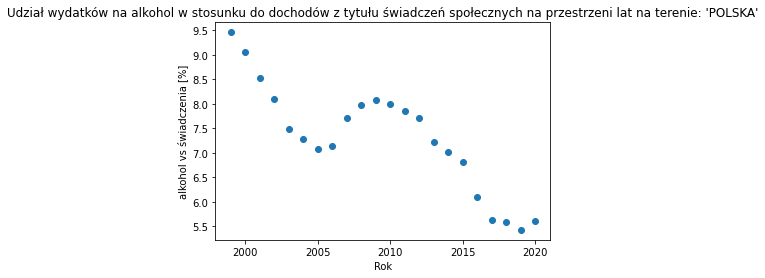

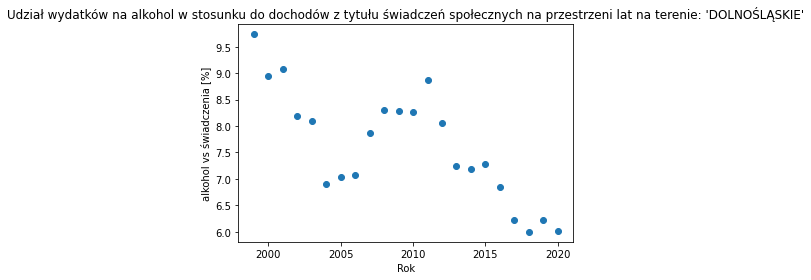

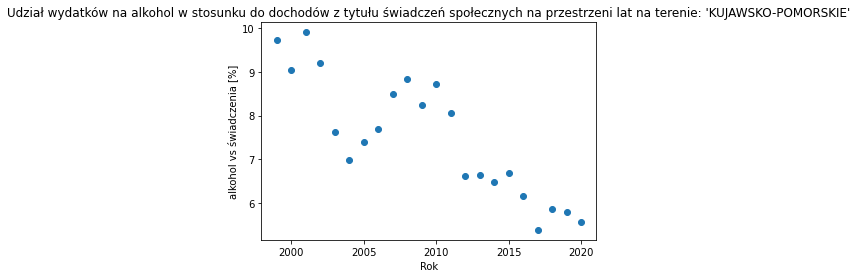

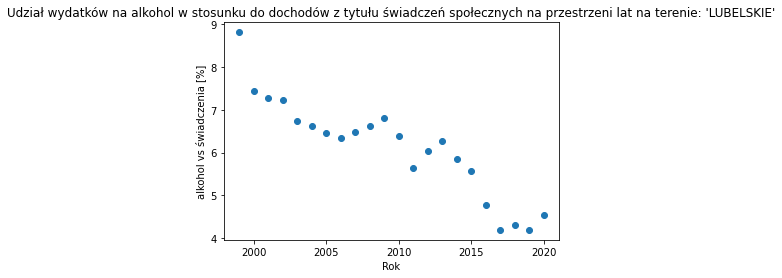

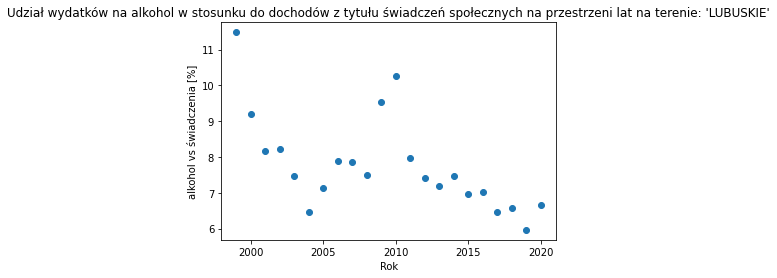

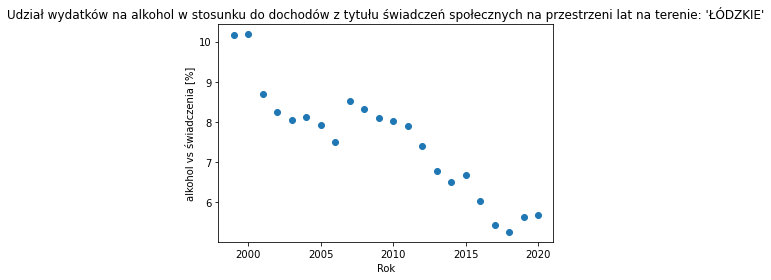

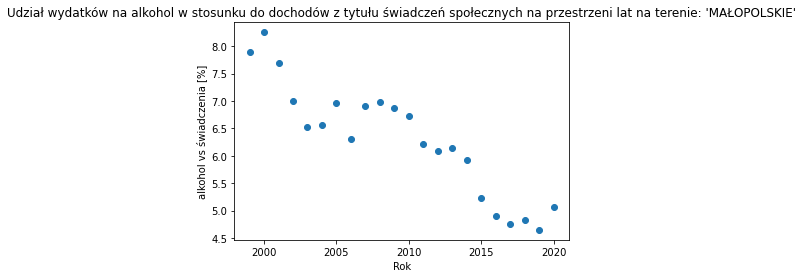

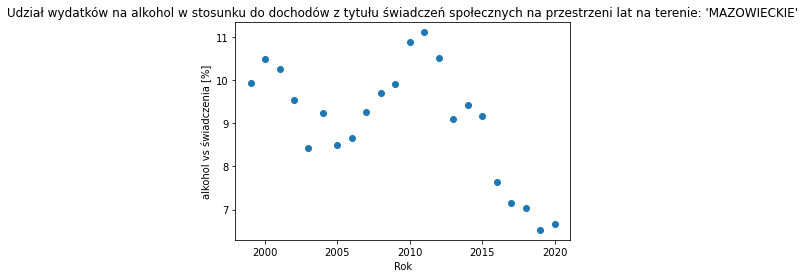

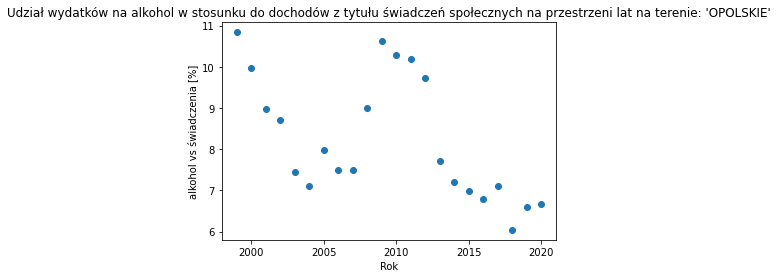

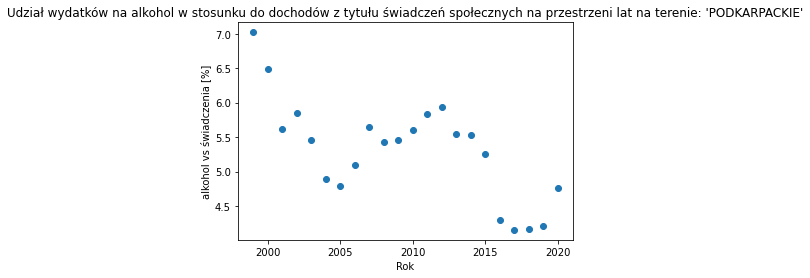

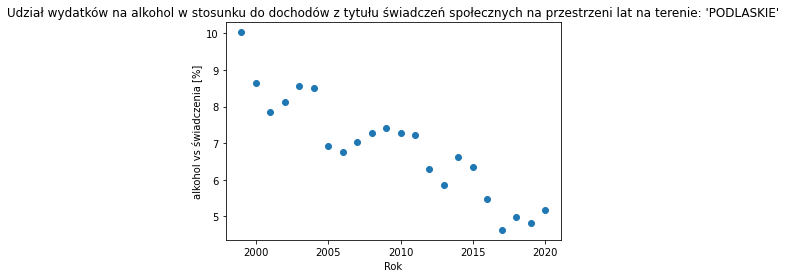

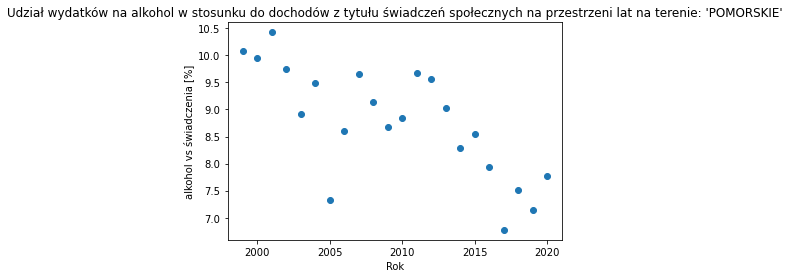

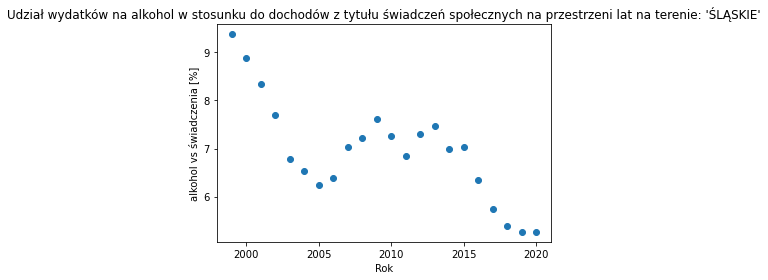

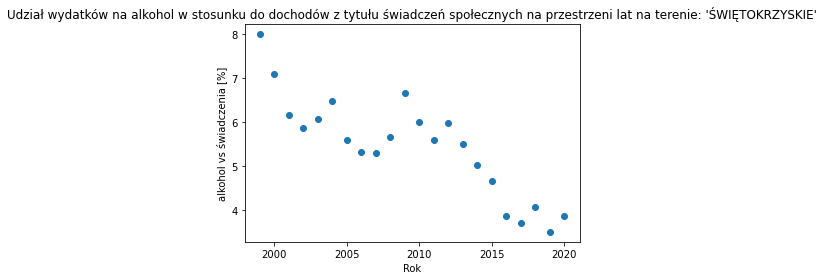

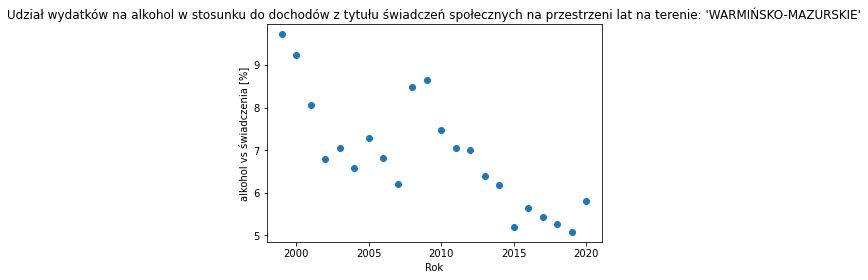

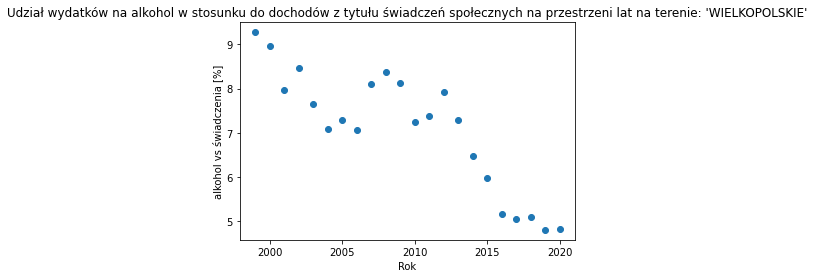

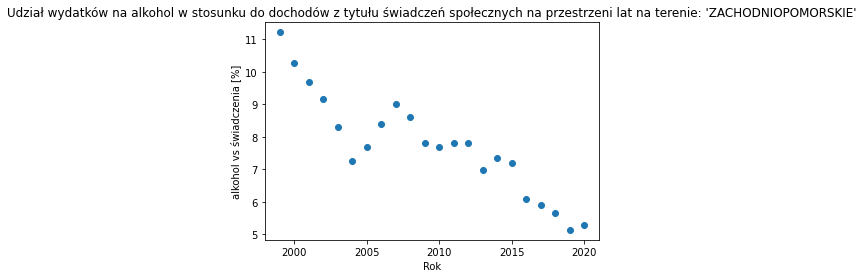

In [5]:
for i in range (0, len(region)):
    alcohol_per_year = df_ludnosc[(df_ludnosc.Kategoria == "Wydatki") & (df_ludnosc.Zmienna == 'napoje alkoholowe i wyroby tytoniowe') & (df_ludnosc.Nazwa == region[i])].Wartosc.values
    benefits_per_year = df_ludnosc[(df_ludnosc.Kategoria == "Dochody") & (df_ludnosc.Zmienna == 'ze świadczeń społecznych') & (df_ludnosc.Nazwa == region[i])].Wartosc.values
    alcohol_vs_benefits_per_year = []
    for j in range (0, len(alcohol_per_year)):
        alcohol_vs_benefits_per_year.append(alcohol_per_year[j]/benefits_per_year[j])
        alcohol_vs_benefits_per_year[j] *= 100
    plt.scatter(lata, alcohol_vs_benefits_per_year)
    plt.xlabel('Rok')
    plt.ylabel('alkohol vs świadczenia [%]')
    plt.title('Udział wydatków na alkohol w stosunku do dochodów z tytułu świadczeń społecznych na przestrzeni lat na terenie: %r' %(region[i]))
    plt.show()